<div class="alert alert-info">
    <h1><strong>EQCI Day 6: </strong>Lab</h1>
    <h2>QKD- BB84</h2>
</div>

In [6]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.visualization import *
from copy import deepcopy
from random import getrandbits

print("Libraries imported successfully!")

Libraries imported successfully!


# Background Knowledge - Keys, Encryption, and Distribution Protocols

**What is key distribution?** Secure communication relies on the ability of the sender \(Alice\) to encrypt the message in a way that the receiver \(Bob\) can decrypt it \- but so that an eavesdropper \(Eve\) _cannot_ decrypt the message. This security is often accomplished with the use of a **key**, which is a piece of information known only to the sender and receiver that enables them to decrypt and encrypt the message. Without the key, the probability of successfully decrypting the message is tiny. So, if a key can be securely distributed between the sender and receiver, the encrypted message can be securely sent over a public channel.

Practically, **a key is just a bitstring** \- a sequence of 1s and 0s that is uniquely known only to Alice and Bob, the two communicating parties.

Therefore, the problem of secure communication boils down to **secure key distribution**. Quantum Key Distribution \(QKD\) is a unique security mechanism, because security against eavesdropping is guaranteed by the laws of quantum mechanics. In comparison, the computational complexity of certain functions used in classical key distribution are more vulnerable to exposure using classical computing methods.

In this notebook, we will develop Qiskit code to implement a form of QKD. 
We will write the code for a model of a **distribution protocol called BB84**. 

---



# The BB84 protocol

The goal of the BB84 protocol is to create and securely share a key, which is just a series of 0s and 1s, between the sender (Alice) and the receiver (Bob). 

## The BB84 protocol achieves this in **3 phases**:

### Phase 1 - Sending

Alice randomly generates a _bitstring_ and a list of _bases_. Some of the bits of the bitstring will make it onto the key. The _bases_ are randomly selected by the protocol and can be either X or Z. Next, Alice **encodes** each bit of the bitstring into a qubit using the corresponding basis in the list of bases. This encoding approach follows this decision scheme: 

| bit in bitstring | basis | State Alice encodes |
|:----------------:|:--------------------------:|:---------------:|
| 0 | Z | $$|0\rangle$$ |
| 1 | Z | $$|1\rangle$$ |
| 0 | X | $$|+\rangle$$ |
| 1 | X | $$|-\rangle$$ |

Alice sends each of these encoded qubits to Bob. So, Alice can send Bob one of **four** possible states: $|0\rangle, |1\rangle, |+\rangle$, and $|-\rangle$.

### Phase 2 - Receiving

Bob receives this qubit, and he now needs to measure each qubit to find out their state. Bob generates a random list of bases, either X or Z, and measures each of the qubits he receives in the corresponding basis to generate his own bitstring. If Bob measures a qubit in the same basis that Alice had encoded it in, his protocol will output the same bit as a result of that measurement as Alice had encoded it. If Bob measures the qubit in a different basis, he is not guaranteed to get the same bit as Alice had measured it. 

### Phase 3 - Comparing

After Bob has measured all qubits that Alice sent him, Alice and Bob publicly declare their list of bases. Alice and Bob then drop from their respective bitstrings the bits for which their **bases do not match**. The remaining bits, for which their bases do match, are **guaranteed to match** as long as no one was eavesdropping when Alice sent Bob her qubits. Therefore, to find out if someone was eavesdropping, Alice and Bob can compare the first few bits of their respective keys and see if they match \(no eavesdropping\) or don't match \(eavesdropping\).

---

## Let's Break that down into 9 steps:



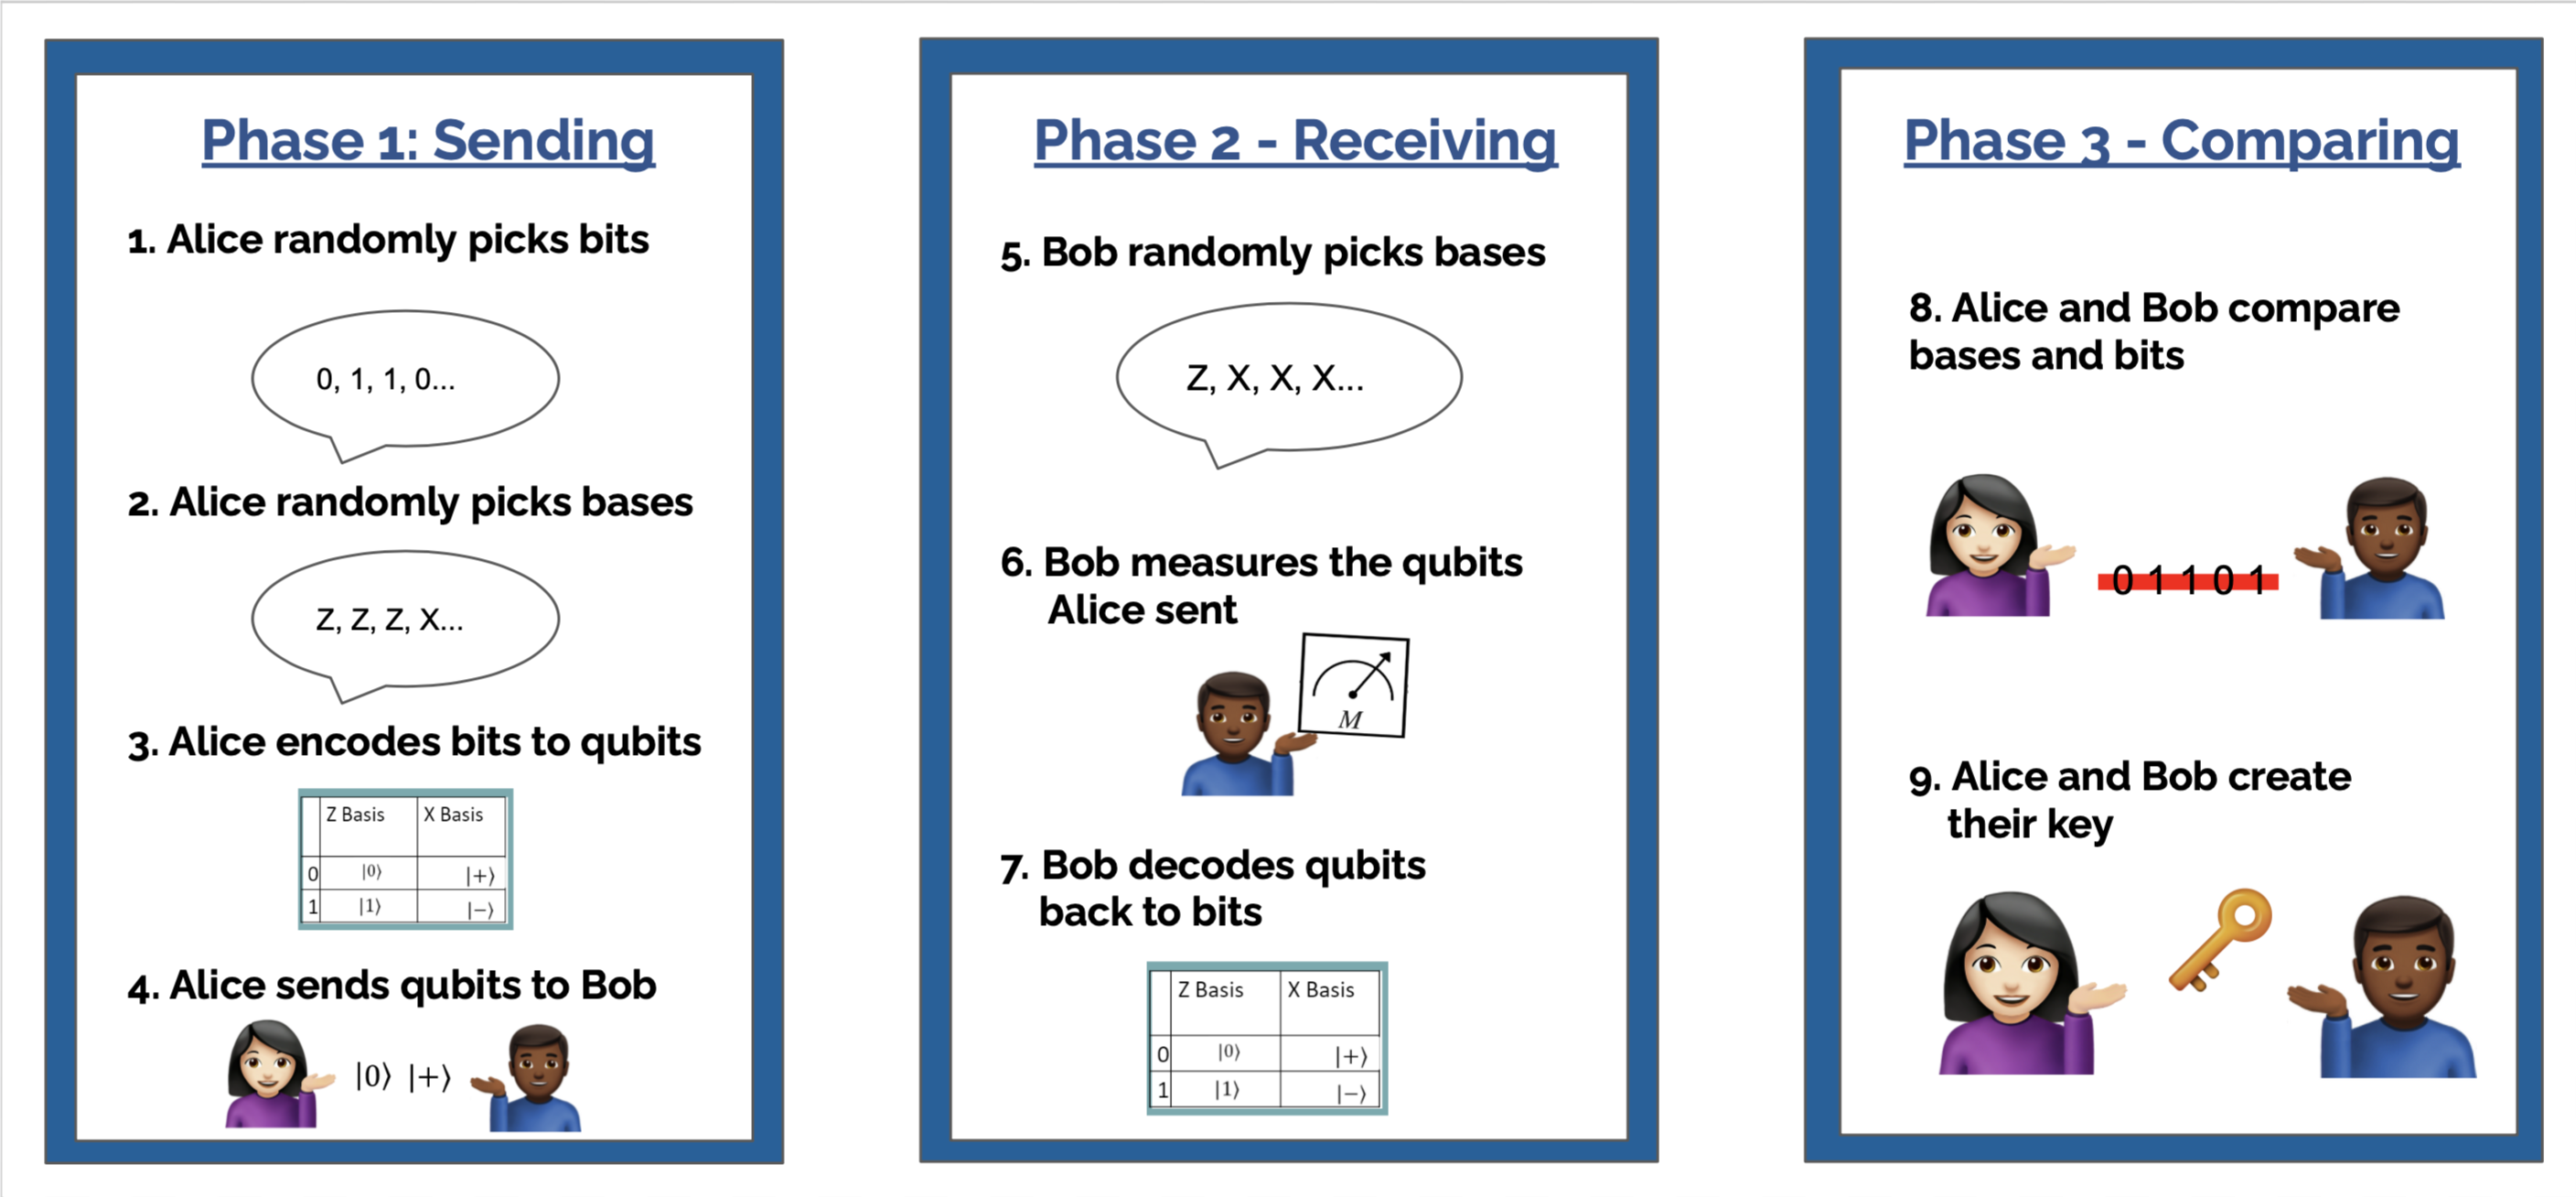

## Here's a coding cheat sheet to help you out

### Defining a quantum circuit: 

```python
qc = QuantumCircuit(1,1) # Define a 1 qubit, 1 classical bit quantum circuit

qc.x(0) #Add an X gate
qc.h(0) #Add an H gate
qc.z(0) #Add a Z gate
qc.y(0) #Add a Y gate

qc.draw() #Draw the circuit
```

### Using the qasm simulator:

First, we have to apply the measurement gates:

``` python
qc.measure_all() #adds measurements
```

Next, we select a backend, execute the job, and extract the result:

``` python
qsim = Aer.get_backend('qasm_simulator') # Change statevector to qasm
job = execute(qc, backend=qsim, shots=1000) # add shots - tell it how many times to run, more shots = lower noise
result = job.result()
```

Last, we can visualize the results as a histogram:

``` python
counts = result.get_counts(qc)
plot_histogram(counts)
```

### Using a real quantum computer:

First we need to find the least busy backend on the IBMQ server:

```python
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
```

Next we can send the job to be run"

``` python
job = execute(qc, backend=backend, shots=100)
result = job.result()
```

Last, we can again plot the results as a histogram:

``` python
counts = result.get_counts(qc)
plot_histogram(counts)
```

___



# Complete the 9 functions for each part of the BB84 protocol:

### Sending Phase

1. **Alice randomly picks bits:** `generate_alice_bits()`
2. **Alice randomly picks bases:** `generate_alice_bases()`
3. **Alice encodes her bits to qubits:** `alice_encode()`
4. **Alice sends qubits to Bob:** `alice_send()`

### Receiving Phase

5. **Bob randomly picks bases:** `generate_bob_bases()`
6. **Bob decodes Alice's qubits:** `decode()`
7. **Bob measures qubits to bits:** `measure()`

### Comparing Phase

8. **Alice and Bob compare bases and bits:** `find_matching_bases()`
9. **Alice and Bob create their key:** `create_key()`

We will now implement the steps one\-by\-one in the BB84 protocol.


## Part 1: Alice randomly picks bits

> Alice needs to randomly select bits that will later get encoded into qubits before she can securely send the message to Bob. Some of these bits will make it onto Alice's \(and Bob's\) final key.

Write a function that takes the length of the key as an input parameter and generates a list called `alice_bits` of randomly selected bits (0s and 1s) using the `getrandbits` function. Store the randomly generated bits as strings in the list.



In [7]:
# BLOCK 1
def generate_alice_bits(length):
    #This stores alice's bits
    alice_bits = []
    
    #TODO
    
    # return the string of bits
    return alice_bits

## Part 2: Alice randomly picks bases

>Alice needs to randomly select bases to encode her bits from the previous step. She will pick randomly from two bases - the Z basis and the X basis.

Write a function that takes the length of the key as an input parameter and generates a list called `alice_bases` of randomly selected bases ("X" and "Z"). Store the randomly generated bases as strings in the list.



In [8]:
# BLOCK 2
def generate_alice_bases(length):
    
    #This stores alice's bases
    alice_bases = []
    
    #TODO
        
    
    # return the string of bases
    return alice_bases

## Part 3: Alice encodes her bits to qubits

> Alice now uses her random list of bits \(`alice_bits`\) and bases \(`alice_bases`\) to generate a list of qubits to send to Bob:
> In this notebook we represent each qubit as an individual `QuantumCircuit`.
> The table below summarizes the qubit states that Alice sends to Bob, based on the bits of Alice's `alice_bits` and the corresponding basis of `alice_bases`:

| Corresponding basis in `alice_bases` | Bit in Alice's `alice_bits` | Qubit state sent |
|:----------------:|:-----------------:|:-----------------:|
| Z | 0 | $$|0\rangle$$ |
| Z | 1 |$$|1\rangle$$ |
| X | 0 |$$|+\rangle$$ |
| X | 1 |$$|-\rangle$$ |

Write a function to encode `alice_bits` using the corresponding basis in `alice_bases`. The function should return a list of quantum circuits called `encoded_qubits`, with each circuit in the list containing the appropriate gates to prepare the correct qubit state for the corresponding bit and basis. 

**Do not add measurements to the circuits yet** \- Bob will add measurements to these qubits after he receives the list of bits and bases from Alice.


In [9]:
# BLOCK 3
def alice_encode(alice_bits, alice_bases):
    encoded_qubits = []
    for i in range(len(alice_bits)):
        # create a brand new quantum circuit called qc. Remember that the qubit will be in state |0> by default
        qc = QuantumCircuit(1,1)
        
        #TODO
        
        # add this quantum circuit to the list of encoded_qubits
        encoded_qubits.append(qc)
        
    return encoded_qubits

## Part 4: Alice sends qubits to Bob

> In a real application, Alice might send their qubits over an _optical fiber_, which would be the quantum channel.

Write a function that sends the qubits from Alice to Bob. **Since we do not have a real\-life fiber optic cable, we cannot implement this step in the simulation. Here, your function should do nothing.**


In [10]:
# BLOCK 4
def alice_send(encoded_qubits):
    # We don't need to do anything here in this example,
    # Imagine our qubits shooting down an optical fiber at the speed of light!
    #TODO
    return encoded_qubits

## Part 5: Bob randomly picks bases

> Bob has received Alice's qubits. Now, Bob needs to randomly select the bases in which he will measure each qubit that Alice sent him.

Write a function that \(1\) takes in the number of bases that Bob needs to pick, and \(2\) returns a list called `bob_bases` which contains randomly selected measurement bases \(either "X" or "Z"\). _Hint: Where have we seen this before_


In [11]:
# BLOCK 5
def generate_bob_bases(length):
    # Similar to Part 2, we store the bases that Bob will measure in a list
    bob_bases = []
    
    #TODO
    
    # return the list of random bases to measure in
    return bob_bases

## Part 6: Bob decodes Alice's qubits

> Bob uses the randomly selected bases created in Part 5 to choose the basis along which he will measure.

Write a function that correctly applies a gate to each circuit in the `encoded_qubits` list depending on the given basis in the `bob_bases` list.



In [12]:
# BLOCK 6
def decode(encoded_qubits, bob_bases):
    for i in range(len(encoded_qubits)):
        qc = encoded_qubits[i]

        #TODO
        
    return encoded_qubits

## Part 7: Bob measures qubits to bits

> Bob now has to measure the qubits that he received from Alice, and he has to put the resulting classical bit in the `bob_bits` list.

Write a function that simulates each circuit using the `"aer_simulator"` and places the measured bit in a list called `bob_bits`. Set the `shots=1`when executing, and extract the counts from the results of the simulation. Instead of plotting a histogram, use the code `measured_bit = max(counts, key=counts.get)` to extract the measured bit \(0 or 1\) from the counts. 


In [21]:
# BLOCK 7
def measure(encoded_qubits):
    bob_bits = []
    for i in range(len(encoded_qubits)):
        qc = encoded_qubits[i]

        #TODO
        
        # No plotting needed!
        measured_bit = max(counts, key=counts.get)

        # Append measured bit to Bob's measured bitstring
        bob_bits.append(measured_bit)
        
    return bob_bits

## Part 8: Alice and Bob compare bases and bits

> In this step, Alice and Bob will compare their lists of bases, and they will throw away the bits for which the corresponding bases do not match. The remaining bits, for which their bases do match, are guaranteed to be the same for both Alice and Bob. These bits can be used as the key to decode their secret message!

Write a function that will generate a list called `agreeing_indices` which contains a list of indices at which both Alice's and Bob's bases (`alice_bases` and `bob_bases`) match.



In [14]:
# BLOCK 8
def find_matching_bases(alice_bases,bob_bases):
    #TODO
            
    return agreeing_indices

## Part 9: Alice and Bob create their key

>Now that Alice and Bob know which of their bases match, they can use the list `agreeing_indices` to generate their keys!

Write a function that uses `agreeing_indices` and a list of bits to generate a key that only contains the bits at the indices given by `agreeing_indices` . Then use that function to generate both Alice's key and Bob's key.


In [15]:
# BLOCK 9
def create_key(agreeing_indices, bits):
    #TODO
    return key

##### If Alice and Bob wanted to verify that no eavesdropper spied on their message, they would compare the first few bits of their key using this protocol.

---

# Now that we have completed coding each step of the BB84 protocol we can test it out!

Run the following 4 code cells and use their print outs to catch where any errors might be. If at the end you see:

```python
"Alice's key is equal to Bob's key: True"
```

You have successfully completed the BB84 protocol!



In [36]:
# BLOCK 10
N = 500 # Number of Qubits Alice and Bob will use during the protocol

'''Sending Phase'''
# 1. Alice randomly picks bits:
alice_bits = generate_alice_bits(N)
# 2. Alice randomly picks bases:
alice_bases = generate_alice_bases(N)
# 3. Alice encodes her bits to qubits:
encoded_qubits = alice_encode(alice_bits, alice_bases)
# 4. Alice sends qubits to Bob:
encoded_qubits = alice_send(encoded_qubits)

# Preview the first 10 bits of each list:
print("alice's first 10 bits: ", alice_bits[:10])
print("alice's first 10 bases: ", alice_bases[:10])

alice's first 10 bits:  ['0', '1', '0', '1', '0', '1', '1', '0', '0', '1']
alice's first 10 bases:  ['X', 'X', 'Z', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'X']


In [37]:
# BLOCK 11
'''Receiving Phase'''
# 5. Bob randomly picks bases:
bob_bases = generate_bob_bases(N)
# 6. Bob decodes Alice's qubits:
decoded_qubits = decode(encoded_qubits, bob_bases)
# 7. Bob measures qubits to bits:
bob_bits = measure(decoded_qubits)

# Preview the first 10 elements of each:
print("bob's first 10 bits: ", bob_bits[:10])
print("bob's first 10 bases: ", bob_bases[:10])

bob's first 10 bits:  ['1', '1', '0', '1', '0', '0', '1', '0', '0', '1']
bob's first 10 bases:  ['Z', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'X']


In [38]:
# BLOCK 12
'''Comparing Phase'''
# 8. Alice and Bob compare bases and bits:
agreeing_indices = find_matching_bases(alice_bases, bob_bases)
# 9. Alice and Bob create their key:
alice_key = create_key(agreeing_indices, alice_bits)
bob_key = create_key(agreeing_indices, bob_bits)

# Check the length of the agreeing indices
# What do you expect this length to be (approximately)? 
# Remember that both Alice and Bob chose randomly from "Z" and "X" to generate their lists of bases.
print("Length of agreeing indices: ", len(agreeing_indices))

Length of agreeing indicies:  266


In [39]:
# BLOCK 13
'''Check if we got it right!'''
# Preview the first 10 bits of each key
print("alice_key: ", alice_key[:10]) 
print("bob_key: ", bob_key[:10])
# Check if the whole key is the same
print("Alice's key is equal to Bob's key: ", alice_key == bob_key)

alice_key:  ['1', '0', '0', '1', '0', '1', '1', '1', '0', '0']
bob_key:  ['1', '0', '0', '1', '0', '1', '1', '1', '0', '0']
Alice's key is equal to Bob's key:  True


---

# Congratulations! You have successfully implemented the BB84 QKD protocol !

## Encrypting and decrypting messages using the key

Once the key is generated, Alice and Bob can use it to securely send and receive messages! In the block below, we have created two helper functions `encrypt_message` and `decrypt_message` that encrypt and decrypt the message. `encrypt_message` uses the unencrypted message, along with the key, to encode the message, while `decrypt_message` uses the encrypted message and the key to decrypt the message.


In [40]:
# BLOCK 14 - creating helper functions to encrypt and decrypt messages using QKD
import binascii

def encrypt_message(unencrypted_string, key):
    # Convert ascii string to binary string
    bits = bin(int(binascii.hexlify(unencrypted_string.encode('utf-8', 'surrogatepass')), 16))[2:]
    bitstring = bits.zfill(8 * ((len(bits) + 7) // 8))
    # created the encrypted string using the key
    encrypted_string = ""
    for i in range(len(bitstring)):
        encrypted_string += str( (int(bitstring[i])^ int(key[i])) )
    return encrypted_string
    
def decrypt_message(encrypted_bits, key):
    # created the unencrypted string using the key
    unencrypted_bits = ""
    for i in range(len(encrypted_bits)):
        unencrypted_bits += str( (int(encrypted_bits[i])^ int(key[i])) )
    # Convert bitstring into
    i = int(unencrypted_bits, 2)
    hex_string = '%x' % i
    n = len(hex_string)
    bits = binascii.unhexlify(hex_string.zfill(n + (n & 1)))
    unencrypted_string = bits.decode('utf-8', 'surrogatepass')
    return unencrypted_string

In the block below, use these two functions to encrypt and decrypt the message using the key you had generated earlier!

In [41]:
# BLOCK 15 - sending and receiving messages using QKD
message = "QKD is cool!"
print("Original Messge:", message)
encrypted_message = encrypt_message(message, alice_key)
print("Encrypted message:", encrypted_message)
decrypted_message = decrypt_message(encrypted_message, bob_key)
print("Decrypted message:", decrypted_message)

Original Messge: QKD is cool!
Encrypted message: 110001100101100010000111000000110010110010111011111011010100110100001000100110101000001110100101
Decrypted message: QKD is cool!


___

## Extra Content

We did not implement an eavesdropper in this protocol so far. The eavesdropper would first intercept Alice's qubits and measure the qubits. Then, after measuring the qubits, the eavesdropper would try to evade detection by passing them on to Bob. In order words, Alice and Bob can detect the eavesdropper's presence by comparing the first few bits of their keys and checking for any differences! Can you implement an eavesdropper function and show that, in the presence of an eavesdropper, Alice and Bob's keys will not match?

Suppose Alice and Bob check the first 20 bits of their keys. What is the probability of successful eavesdropping?

Can you think of any other eavesdropping strategies that would be more successful?

___



### © 2022 The Coding School

**All rights reserved**

*Use of this activity is for personal use only. Copying, reproducing, distributing, posting or sharing this activity in any manner with any third party are prohibited under the terms of this registration. All rights not specifically licensed under the registration are reserved.*